In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

In [2]:
def linreg(X,Y):
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]
    
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha = 0.3)
    plt.plot(X2, Y_hat, 'r', alpha=0.9)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    return model.summary()

In [3]:

!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     64.27
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.23e-14
Time:                        13:49:41   Log-Likelihood:                 549.18
No. Observations:                 251   AIC:                            -1094.
Df Residuals:                     249   BIC:                            -1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.002      0.532      0.595      -0.002       0.004
x1             1.9542      0.244      8.017      0.000       1.474       2.434
==============================================================================
Omnibus:                       64.854   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.766
Skew:                           0.865   Prob(JB):                     1.54e-82
Kurtosis:                       8.747   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

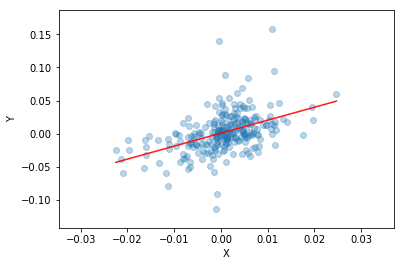

In [6]:
asset = pdr.data.DataReader('TSLA', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
r_a = asset.pct_change()[1:]
benchmark = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1345
Date:                Mon, 29 Apr 2019   Prob (F-statistic):              0.715
Time:                        13:56:44   Log-Likelihood:                -14.973
No. Observations:                 100   AIC:                             33.95
Df Residuals:                      98   BIC:                             39.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4877      0.057      8.574      0.000       0.375       0.601
x1            -0.0372      0.101     -0.367      0.715      -0.238       0.164
==============================================================================
Omnibus:                       22.776   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.433
Skew:                           0.133   Prob(JB):                       0.0661
Kurtosis:                       1.890   Cond. No.                         4.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

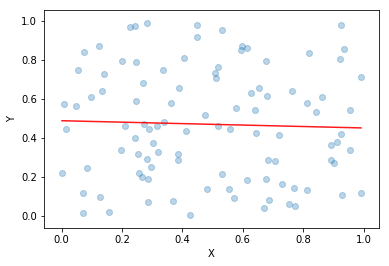

In [9]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X,Y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.11e-24
Time:                        13:58:38   Log-Likelihood:                 19.774
No. Observations:                 100   AIC:                            -35.55
Df Residuals:                      98   BIC:                            -30.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0231      0.040      0.576      0.566      -0.057       0.103
x1             0.9599      0.072     13.396      0.000       0.818       1.102
==============================================================================
Omnibus:                        1.617   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.417
Skew:                           0.145   Prob(JB):                        0.492
Kurtosis:                       2.494   Cond. No.                         4.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

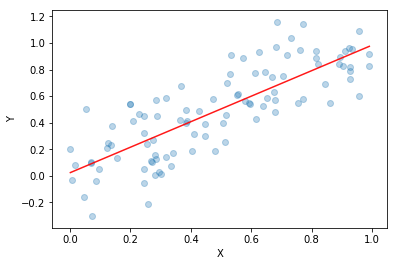

In [13]:
Y = X + 0.2 * np.random.randn(100)
linreg(X,Y)

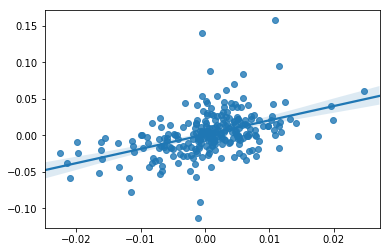

In [15]:
import seaborn
seaborn.regplot(r_b.values, r_a.values)